In [1]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
import pandas as pd

# <font color = 'red'> ЛР 2. Дифференцирование функций многих переменных. Линейная регрессия по произвольному базису. </font>

Сложность: <font color = 'orange'> Нормально  </font>.

Дата составления: 16.09.2024

Срок выполнения: 2 недели.

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'> 1. Дифференцирование функции векторного аргумента. База.  </font>

Вспоминаем понятие дифференцирования.

Пусть, для начала, $f$ - функция одного аргумента, возвращающая один аргумент. Иными словами, $f:\mathbb{R} \rightarrow \mathbb{R}$.

Говорят, что $f$ **дифференцируема** в точке $x_{0}$, если существует конечный предел: $$\lim\limits_{h \to 0} \frac{f(x_{0}+h) - f(x_{0})}{h} = f'(x_{0})$$.

Его называют производной функции в точке $x_{0}$.  Это жу информацию можно записать в дифференциальной форме:  $$f(x_{0}+h) - f(x_{0}) = f'(x_{0}) h + o(h) = [Df_{x_{0}}](h) + o(h)$$.Величину $f'(x_{0}) h = [Df_{x_{0}}](h)$ называют **дифференциалом функции**.


Теперь предположим, что функция $f$ работает несколько иначе. Теперь она принимает на вход векторный аргумент, а возвращает всё ещё скалярный $f:\mathbb{R^{m}} \rightarrow \mathbb{R}$. 

Теперь понятие дифференциала вводят несколько иначе. Мы всё также можем записать: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = \sum\limits_{j=1}^m \frac{\partial f}{\partial x_{m}}\bigg\rvert_{x=\overline{x_{0}}}h_{i} = [Df_{x_{0}}](\overline{h}) + o(||\overline{h}||)$$.

Или же в более сжатой форме: $$f(\overline{x_{0}}+\overline{h}) - f(\overline{x_{0}}) = (\nabla_{x_{0}} f)\cdot\overline{h} + o(||\overline{h}||) $$

Под производной в этом случае понимают **вектор** (чаще его пищут в виде вектор-столбца) градиента $\nabla_{x_{0}} f = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}}\\...\\\frac{\partial f}{\partial x_{m}} \end{bmatrix}\bigg\rvert_{x=\overline{x_{0}}}$.

В МО мы вынуждены работать с задачами оптимизации как раз таких функций, что немедленно отсылает нас к производным. В частности, используя лекционные записи, вы легко можете получить две несложных формулы матричного дифференцирования.

1. Если функция $f(\overline{x}) = \overline{a}^{T} \cdot\overline{x}$, то $f'(\overline{x}) = \overline{a} $. Где $\overline{x},\overline{a} $ - вектор столбцы.

2.  Если функция $f(\overline{x}) = \overline{x}^{T} A\overline{x}$, то $f'(\overline{x}) = (A+A^{T})\overline{x} $. Где $\overline{x}$ - вектор столбец, $A$ - квадратная матрица соответсвующего размера.


В будущем, возможно, мы дополним список. А пока можете поупражняться [самостоятельно](https://atmos.washington.edu/~dennis/MatrixCalculus.pdf). 


Теперь проверим справедливость формулы 2.

In [8]:
A = np.random.randint(10,size =(10,10))
A

array([[8, 2, 8, 4, 4, 4, 2, 5, 0, 1],
       [8, 2, 6, 8, 9, 8, 5, 9, 6, 3],
       [1, 5, 0, 1, 1, 2, 3, 5, 6, 1],
       [5, 3, 8, 3, 3, 7, 7, 3, 4, 4],
       [9, 7, 3, 5, 9, 9, 3, 4, 6, 2],
       [1, 3, 4, 7, 5, 5, 5, 5, 2, 4],
       [7, 7, 0, 8, 2, 6, 4, 8, 2, 6],
       [2, 9, 3, 3, 6, 2, 8, 2, 3, 7],
       [0, 7, 8, 2, 9, 8, 5, 0, 3, 6],
       [8, 8, 5, 4, 3, 4, 0, 9, 9, 4]], dtype=int32)

In [9]:
def func(x): 
    return np.dot(np.dot(x.T,A),x) #задаём вектор-функцию согласно формуле 2

In [10]:
x0 = np.arange(0,10) # конкретные значения x0
x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
grad = nd.Gradient(func)(x0) #находим производную в точке x0(градиент) встроенными численными методами
grad

array([316., 579., 324., 401., 455., 438., 408., 419., 415., 447.])

In [12]:
np.dot(A + A.T,x0) # а теперь по нашей формуле. Всё сходится.

array([316, 579, 324, 401, 455, 438, 408, 419, 415, 447])

<font color = 'red' size = 5>Задание 1 </font>

1. Изучите подробно формулы полученные выше. Попрактикуйтесь самостоятельно в их выводе.
2. Получите ещё 2 любых формулы для подобного матричного или векторного дифференцирования. Вывод формул кратко оформите в документе.
3. Проверьте справедливость полученных вами формул с помощью встроенных функций пакета numdifftools.

In [ ]:
# task3 (1)
a = np.random.randint(10, size=10)
a

array([7, 8, 9, 6, 8, 6, 7, 2, 8, 6], dtype=int32)

In [25]:
def func(x): 
    return a @ x

x0 = np.arange(0,10)

x0

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:

grad = nd.Gradient(func)(x0)
grad

array([7., 8., 9., 6., 8., 6., 7., 2., 8., 6.])

In [27]:
a.T

array([7, 8, 9, 6, 8, 6, 7, 2, 8, 6], dtype=int32)

In [12]:
#task3 (2)
A = np.random.randint(10,size =(10,10))
A

array([[7, 5, 2, 7, 3, 5, 7, 6, 9, 3],
       [9, 5, 8, 0, 7, 4, 4, 0, 3, 3],
       [0, 1, 1, 1, 5, 7, 1, 9, 8, 4],
       [3, 8, 9, 6, 4, 0, 0, 2, 4, 2],
       [6, 9, 9, 3, 4, 1, 0, 4, 8, 2],
       [3, 5, 1, 4, 6, 9, 6, 4, 5, 7],
       [4, 2, 2, 2, 1, 0, 8, 8, 2, 5],
       [5, 2, 1, 4, 2, 9, 0, 2, 7, 3],
       [9, 4, 6, 3, 4, 3, 1, 5, 5, 2],
       [4, 1, 4, 6, 3, 5, 8, 1, 0, 0]], dtype=int32)

In [13]:
def func(x): 
    return x.T @ A @ A.T @ x

x0 = np.arange(0,10)

In [14]:
grad = nd.Gradient(func)(x0)
grad

array([19256., 15474., 12792., 13122., 16358., 17090., 11526., 12888.,
       15358., 11478.])

In [47]:
2 * A @ A.T @ x0

array([23326, 19002, 18672, 17454, 25638, 31598, 25662, 23530, 27486,
       23410])

In [ ]:
# #Matrix trace
# A = np.random.randint(10,size =(10,10))

#У нас же след матрицы возвращает скаляр, как мы производную потом брать будем от скаляра?

In [ ]:
# def func(x):
#     x = np.array(x)
#     return np.trace(x.T @ A @ x)

In [34]:
# grad = nd.Gradient(func)(x0)
# grad

## <font color = 'green'> 2. Линейная регрессия по произвольному базису. </font>

Пусть задано множество пар признаков(фич) и меток $A = \{(\overline{X}_{1},y_{1}),(\overline{X}_{2},y_{2}),...,(\overline{X}_{n},y_{n})\}$. Важно понимать, что теперь каждый элемент множества признаков это вектор состоящий из некоторого числа $k$ признаков  $\overline{X}_{i} = (x_{1},x_{2},...x_{k})$.

Стоит задача получить функцию, позволяющую предсказывать непрерывную метку по $y$ набору признаков $X$. Такую задачу называют множественной регрессией. 

Для решения данной задачи можно использовать формулу множественной регрессии:$$f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $$.

В приведённой выше формуле, стоит взвешенная сумма некоторых произвольных функций от вектора фич. Это и есть **формула множественной линейной регрессии по произвольному базису**. 

Частным случаем такой регрессии можно считать тривиальную линейную регрессию, когда $\phi_{i}(\overline{X}) = x_{i}$. Тогда добавив фиктивную функцию $\phi_{0}(\overline{x}) = 1$ получим формулу **классической линейной регрессии**.

$$f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{j} x_{j} $$

Тут $m = k + 1 $

Обратите внимание, что формула парной регресии $f(x) = a x +b $ - тоже частный случай вышеприведённой. 

Также стоит заметить, *что количество базисных функций может быть как меньшим, так и большим, чем количество изначальных фич*.

Теперь приступим к **обучению полученной модели** $f(\overline{x})=\sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{x}) $. Оно сводится к нахождению весов $w_{1},...,w_{m}$ на основе исходных обучающих данных.

Аналогично парной регрессии составим функцию потерь и минимизируем её: $$ \mathcal{L}(\overline{w}) =\sum\limits_{i=1}^n (y_{i} - \sum\limits_{j=1}^m w_{j} \phi_{j}(\overline{X_{i}}))^2 \rightarrow min$$.

Конечно проще записать эту формулу в матричном виде (получите её самостоятельно): $$ \mathcal{L}(\overline{w}) = (\overline{y} - Q\cdot\overline{w})^{T}(\overline{y} - Q\cdot\overline{w}), $$
где $Q$ - *информационная матрица*, которая определяется следующим образом: $$Q=\begin{bmatrix}
    \phi_{1}(\overline{x_{1}})       &  \phi_{2}(\overline{x_{1}}) & \phi_{3}(\overline{x_{1}}) & \dots & \phi_{m}(\overline{x_{1}}) \\
    \phi_{1}(\overline{x_{2}})       &  \phi_{2}(\overline{x_{2}}) & \phi_{3}(\overline{x_{2}}) & \dots & \phi_{m}(\overline{x_{2}})   \\
                            ...\\
    \phi_{1}(\overline{x_{n}})       &  \phi_{2}(\overline{x_{n}}) & \phi_{3}(\overline{x_{n}}) & \dots & \phi_{m}(\overline{x_{n}}) 
    \end{bmatrix}, $$

$\overline{w}$ - вектор столбец весов: $$ \overline{w} = \begin{bmatrix} 
    w_{1}\\
    w_{2}\\
    ...\\
    w_{m}
    \end{bmatrix},
    $$

$\overline{y}$ - вектор столбец известных целевых меток: $$ \overline{y} = \begin{bmatrix} 
    y_{1}\\
    y_{2}\\
    ...\\
    y_{n}
    \end{bmatrix}.
    $$


Далее решаем задачу оптимизации. Отыщем производную полученной скалярной вектор-функции и приравняем к 0, опираясь на знания из п. 1.$$\frac{\partial \mathcal{L}}{\partial w} = \nabla \mathcal{L} =\nabla \mathcal{L}((\overline{y} - Q\cdot\overline{w})(\overline{y} - Q\cdot\overline{w})^{T}) = \nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = 0$$

Далее применяем формулы из п. 1. $$\nabla \mathcal{L} (\overline{y}^{T} \overline{y}-2\overline{y}^{T} Q\overline{w}+\overline{w}^{T} Q^{T} Q\overline{w} ) = (-2 Q^{T} \overline{y}+ 2 Q^{T} Q \overline{w}) = 0.$$

Откуда немедленно получаем итоговую формулу для вектора весов: $$\overline{w} = (Q^{T} Q)^{-1} Q^{T} \overline{y}$$.


Полученная формула имеет некоторые ограничения (подумайте какие). Также следует продумывать выбор базисных функций. Для получения *информационной матрицы* исходные данные требуют некоторого преобразования в зависимости от выбора базисных функций.

<font color = 'orange' size = 3>Пример 1 </font>

Для начала используем встроенные возможности.

In [37]:
rng = np.random.RandomState(1) # задаём искусственные данные
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

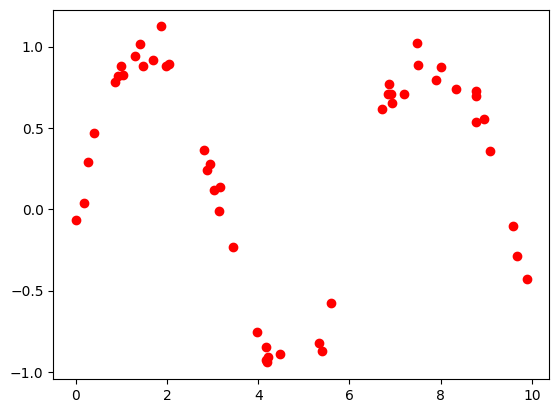

In [38]:
plt.scatter(x, y, c ='red')

In [39]:
from sklearn.linear_model import LinearRegression #пробуем обучить стандартную модель регрессии из ЛР1 
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [41]:
X = x[:, np.newaxis]
(X.shape,x.shape)

((50, 1), (50,))

In [42]:
model.fit(X, y)

LinearRegression()

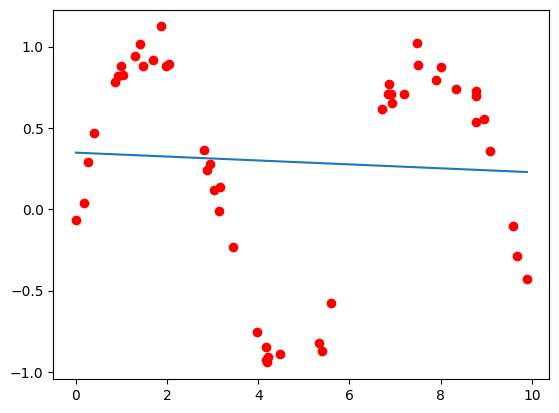

In [43]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]# по рисунку видим, что получили хрень
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(testx))

In [44]:
model.score(X,y)# позорище, а не модель

0.003269744706462907

In [45]:
(model.coef_,model.intercept_)

(array([-0.01203828]), np.float64(0.34794576296220453))

А теперь добавим другой базис. Видно, что функция похожа на степенную. Используем полиномиальный базис.
Класс [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) позволяет преобразовать ваши данные  и перейти от стандартного базиса ${x_1,x_2,...x_n}$ полиномиальному базису, который состоит из всех возможных функций $x_1^{k1}x_2^{k2}...x_n^{kn} : k1+k2+...kn<=4$

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)

In [47]:
X_new = poly_reg.fit_transform(X)

In [48]:
X_new #вместо одного x теперь целый вектор фич степени от 0 до 4

array([[1.00000000e+00, 4.17022005e+00, 1.73907352e+01, 7.25231927e+01,
        3.02437672e+02],
       [1.00000000e+00, 7.20324493e+00, 5.18867376e+01, 3.73752880e+02,
        2.69223354e+03],
       [1.00000000e+00, 1.14374817e-03, 1.30815988e-06, 1.49620548e-09,
        1.71128228e-12],
       [1.00000000e+00, 3.02332573e+00, 9.14049845e+00, 2.76347041e+01,
        8.35487119e+01],
       [1.00000000e+00, 1.46755891e+00, 2.15372915e+00, 3.16072440e+00,
        4.63854925e+00],
       [1.00000000e+00, 9.23385948e-01, 8.52641608e-01, 7.87317280e-01,
        7.26997712e-01],
       [1.00000000e+00, 1.86260211e+00, 3.46928663e+00, 6.46190062e+00,
        1.20359498e+01],
       [1.00000000e+00, 3.45560727e+00, 1.19412216e+01, 4.12641722e+01,
        1.42592773e+02],
       [1.00000000e+00, 3.96767474e+00, 1.57424429e+01, 6.24608929e+01,
        2.47824507e+02],
       [1.00000000e+00, 5.38816734e+00, 2.90323473e+01, 1.56431145e+02,
        8.42877189e+02],
       [1.00000000e+00, 4.1919

In [49]:
model = LinearRegression(fit_intercept=False)
model

LinearRegression(fit_intercept=False)

In [50]:
model.fit(X_new, y)

LinearRegression(fit_intercept=False)

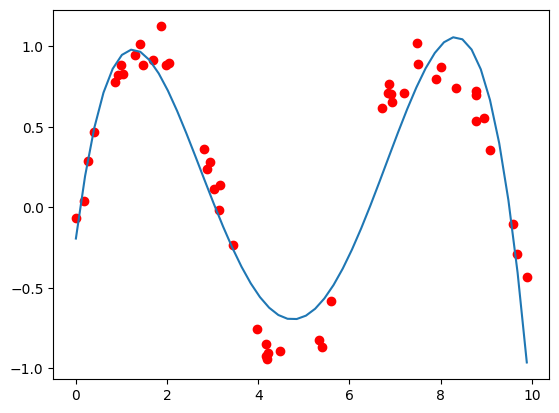

In [51]:
testx = np.linspace(np.min(x),np.max(x),50)[:, np.newaxis]
plt.scatter(x, y, c ='red')
plt.plot(testx,model.predict(poly_reg.fit_transform(testx)))
# теперь для предсказания модели нужно передавать преобразованные в тот же базис данные
# результат лучше

In [52]:
model.score(X_new,y)# уже лучше!

0.8709660328448405

In [53]:
(model.coef_,model.intercept_) # а вот и полученные веса для базисных функций. 

(array([-0.19599947,  2.16741907, -1.22565575,  0.20937262, -0.01096061]), 0.0)

**Упражнение** Подумайте, за что отвечает параметр fit_intercept и почему первый коэффициент равен 0

<font color = 'orange' size = 3>Пример 2 </font>

Теперь возьмём многомерные фичи. Используем рыбный датасет из файла Fish.csv и попробуем создать модель регрессии для предсказания веса (столбец weight).

Попробуем использовать стандартную формулу для классической регрессии $f(\overline{x})=w_{0} + \sum\limits_{j=1}^k w_{i} x_{i} $.


In [56]:
dataframe=pd.read_csv("Fish.csv") # загружаем данные
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [57]:
X = dataframe.drop(["Species","Weight"],axis=1).values # выбираем то, что будет фичами

In [58]:
X

array([[23.2   , 25.4   , 30.    , 11.52  ,  4.02  ],
       [24.    , 26.3   , 31.2   , 12.48  ,  4.3056],
       [23.9   , 26.5   , 31.1   , 12.3778,  4.6961],
       [26.3   , 29.    , 33.5   , 12.73  ,  4.4555],
       [26.5   , 29.    , 34.    , 12.444 ,  5.134 ],
       [26.8   , 29.7   , 34.7   , 13.6024,  4.9274],
       [26.8   , 29.7   , 34.5   , 14.1795,  5.2785],
       [27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [27.6   , 30.    , 35.1   , 14.0049,  4.8438],
       [28.5   , 30.7   , 36.2   , 14.2266,  4.9594],
       [28.4   , 31.    , 36.2   , 14.2628,  5.1042],
       [28.7   , 31.    , 36.2   , 14.3714,  4.8146],
       [29.1   , 31.5   , 36.4   , 13.7592,  4.368 ],
       [29.5   , 32.    , 37.3   , 13.9129,  5.0728],
       [29.4   , 32.    , 37.2   , 14.9544,  5.1708],
       [29.4   , 32.    , 37.2   , 15.438 ,  5.58  ],
       [30.4   , 33.    , 38.3   , 14.8604,  5.2854],
       [30.4   , 33.    , 38.5   , 14.938 ,  5.1975],
       [30.9   , 33.5   , 38

In [59]:
y = dataframe["Weight"].values # вес будем предсказывать

In [60]:
y

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
        700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
        700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  120. ,  150. ,  145. ,  160. ,  140. ,  160. ,
        169. ,  161. ,  200. ,  180. ,  290. ,  272. ,  390. ,  270. ,
        270. ,  306. ,  540. ,  800. , 1000. ,   55. ,   60. ,   90. ,
        120. ,  150. ,  140. ,  170. ,  145. ,  200. ,  273. ,  300. ,
          5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
      

In [61]:
model = LinearRegression(fit_intercept=True) # модель регрессии по умолчанию будет использовать стандартный базис
model

LinearRegression()

In [62]:
model.fit(X, y)

LinearRegression()

In [63]:
model.score(X,y)

0.8852867046546207

In [64]:
(model.coef_,model.intercept_)

(array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 np.float64(-499.5869553569422))

<font color = 'red' size = 5>Задание 2 </font>

1. Изучите подробно описанные выше примеры.
2. Реализуйте функции для работы регрессии по произвольному базису самостоятельно (используйте только базовые функции и numpy), используя формулы, полученные выше. Используйте матричные вычисления!
3. Попрактикуйте модели и вашу и встроенную на разных искусственных данных.
4. Постройте модели (встроенную и вашу) для прогнозирования веса рыбы из файла Fish.csv. Попробуйте различные базисы, различные комбинации фич и постарайтесь повысить точность прогноза.
5. Попытайтесь предсказать [Цену дома (Med house val)](https://www.kaggle.com/datasets/shibumohapatra/house-price/data) используя вашу собственную и встроенные модели с различными базисами. 
6. Подумайте, как повлияет на модель использование слишком большого количества базисных фич.
7. В примере выше мы тестируем полученную модель на тех же данных, что и обучаем. В целом это не очень хорошо. Разделите изначальные данные на обучающую и тестовую выборку и повторите вычисления точности.
8. Попробуйте на тестовых или реальных данных повышать сложность модели. Например добавляя фичи всё большей и большей степени. Как это влияет на точность на обучющих и тестовых данных??


Указание! Для оценки качества модели, в случае, если рисунок не возможен используйте [коэффициент детерминации](https://wiki.loginom.ru/articles/coefficient-of-determination.html): $$R^{2}=1-\frac{(\overline{y} -f(\overline{x}))(\overline{y} - f(\overline{x}))^{T}}{(\overline{y} - mean(\overline{y}))(\overline{y} - mean(\overline{y}))^{T}},$$

где $\overline{y}$ - столбец обучающих меток, $f(\overline{x})$ - функция предсказания применённая к вектор столбцу исходных признаков. 

In [ ]:
#task2
class LinearRegressionCustom():
    #конструктор
    def __init__(self):
        #наши веса
        self.w = None

    def fit(self, X, y):
        #проверяем на то что матрица не вырождена
        if np.abs(np.linalg.det(X.T @ X)) > 0.001:
            print(np.linalg.det(X.T @ X))
            self.w = np.linalg.inv(X.T @ X) @ X.T @ y
        
        #регуляризуем ее если вырождена
        else:
            self.w = np.linalg.inv((xx:=(X.T @ X)) + np.eye(xx.shape[0])) @ X.T @ y
            print(f'Error: Singular matrix!\nWeights calculated with identity matrix')

        return self

    def predict(self, X):
        #проверяем представлен ли Х в виде датафрейма 
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return X @ self.w

In [67]:
def plot_lin_reg(x, y_true, y_pred):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x[::,0], x[::,1], y_true)
    ax.plot_trisurf(x[::,0], x[::,1], y_pred, color='tab:orange', alpha=0.3)
    plt.show()

49510.5661373346


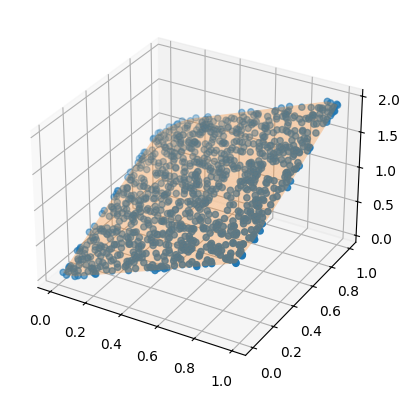

In [75]:
#task3
#y = w1x1 + w2x2
N = 1000
x = np.random.rand(N, 2)
y_true = x[::,0] + x[::,1]
y_pred = LinearRegressionCustom().fit(x, y_true).predict(x)

plot_lin_reg(x, y_true, y_pred)

0.295659427724353


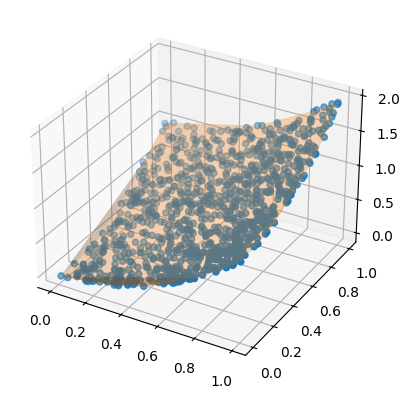

In [77]:
#y = w1x1^2 + w2x2^2, polinom_deg = 4
pf = PolynomialFeatures(degree=4)
x = np.random.rand(N, 2)
y_true = x[::,0] ** 2 + x[::,1] ** 2
y_pred = LinearRegressionCustom().fit(pf.fit_transform(x), y_true).predict(pf.fit_transform(x))

plot_lin_reg(x, y_true, y_pred)

<font color = 'red' size = 5>Задание 3. </font>

1. Используя полученные знания о линейной регрессии примените их на реальных данных.
Применяйте различные методы, стройте валидационные кривые, подбирайте гиперпараметры, преобразуйте данные, для получения лучших по качеству эстиматоров.
Данные о велосипедном трафике из файлов (fermont_bridge.csv) и (BycicleWeather.csv). В одном из файлов данные о количестве велосипедистов, проехавщих по мосту в виде временного ряда, а в другом данные о погоде в том же районе. Совместите и предскажите велотрафик.
3. При работе используйте не только встроенные, но и свои собственные функции. 

to be continued... 🧡